Question: are months impacting matches and dates?
How do attribut contributed to the decision?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

0. data meeting and preparation of the workng dataframe

In [2]:
raw = pd.read_csv("src/Speed Dating Data.csv", encoding="ISO-8859-1")
raw.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#raw.columns.tolist()

In [4]:
# mois en catégorie
raw['month'] = raw['wave'].apply(lambda x : 'october' if x in [1, 2, 12, 13, 14]
                                                      else 'november' if x in [3, 4, 5] 
                                                      else 'march' if x in [6, 7]
                                                      else 'april' if x in [8, 9, 18, 19, 20, 21]
                                                      else 'september' if x in [10, 11]
                                                      else 'february')

# mois en int
raw['month_int'] = raw['wave'].apply(lambda x : 10 if x in [1, 2, 12, 13, 14]
                                                      else 11 if x in [3, 4, 5] 
                                                      else 3 if x in [6, 7]
                                                      else 4 if x in [8, 9, 18, 19, 20, 21]
                                                      else 9 if x in [10, 11]
                                                      else 2)
display(raw.loc[2500, ["wave", "month"]])

wave         8
month    april
Name: 2500, dtype: object

In [5]:
# extraction of the working variables (less time processing in the following script)
to_extract = ["iid", "gender", "age", "condtn", "wave", "month", "month_int", "goal", "position",
              "positin1", "order", "partner", "pid", "age_o", "like",
              "date", "go_out", "expnum", "round", "match", "dec_o", "you_call", "them_cal", "date_3", "numdat_2", "satis_2", "length", 
              "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o",
              "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1",
              "attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2",
              "attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2",
              "attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3",
              "attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]
tab = raw[to_extract]

In [6]:
display(tab.shape)
display(tab.head())
display(tab.describe(include="all"))

(8378, 63)

,iid,gender,age,condtn,wave,month,month_int,goal,position,positin1,...,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3
0,1,0,21.0,1,1,october,10,2.0,7,NaN,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,21.0,1,1,october,10,2.0,7,NaN,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,21.0,1,1,october,10,2.0,7,NaN,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,21.0,1,1,october,10,2.0,7,NaN,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,21.0,1,1,october,10,2.0,7,NaN,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN


,iid,gender,age,condtn,wave,month,month_int,goal,position,positin1,...,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3
count,8378.000000,8378.000000,8283.000000,8378.000000,8378.000000,8378,8378.000000,8299.000000,8378.000000,6532.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,april,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2574,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,0.500597,26.358928,1.828837,11.350919,NaN,6.674147,2.122063,9.042731,9.295775,...,19.411346,16.233415,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837
std,158.583367,0.500029,3.566763,0.376673,5.995903,NaN,3.410767,1.407181,5.514939,5.650199,...,6.124502,5.163777,5.900697,6.557041,17.551540,9.336288,7.880088,7.231325,6.100502,8.615985
min,1.000000,0.000000,18.000000,1.000000,1.000000,NaN,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.000000,24.000000,2.000000,7.000000,NaN,4.000000,1.000000,4.000000,4.000000,...,16.670000,14.810000,5.000000,10.000000,20.000000,10.000000,10.000000,10.000000,0.000000,5.000000
50%,281.000000,1.000000,26.000000,2.000000,11.000000,NaN,4.000000,2.000000,8.000000,9.000000,...,20.000000,16.330000,10.000000,14.290000,25.000000,15.000000,18.000000,17.000000,10.000000,10.000000
75%,407.000000,1.000000,28.000000,2.000000,15.000000,NaN,10.000000,2.000000,13.000000,14.000000,...,20.000000,20.000000,15.000000,16.670000,40.000000,20.000000,20.000000,20.000000,10.000000,20.000000


In [7]:
tab.isna().sum()

iid            0
gender         0
age           95
condtn         0
wave           0
            ... 
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
Length: 63, dtype: int64

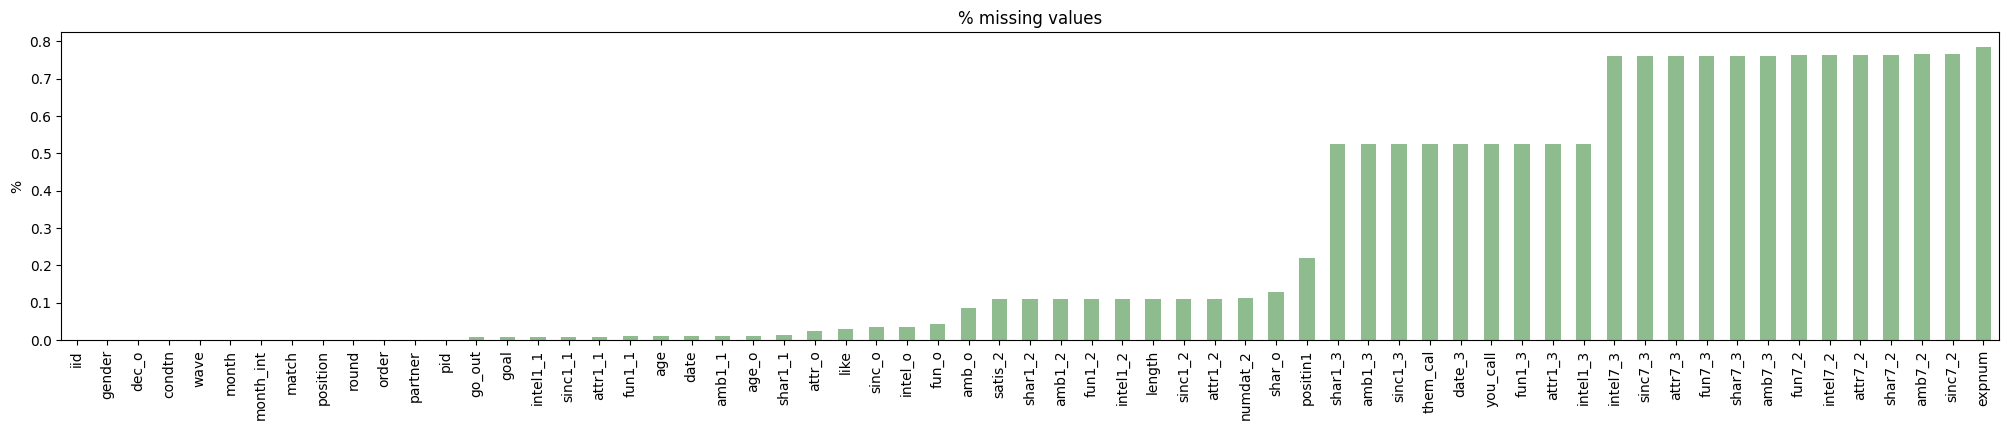

In [8]:
# visualisation données manquantes
tab.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 4), color= "darkseagreen",
    title="% missing values",
    ylabel="%")
plt.show()

In [9]:
# removing rows without age
tab = tab.loc[(tab["age"].isna() == False)]
tab.shape

(8283, 63)

In [ ]:
tab["goal_c"] = tab["goal"].apply(lambda x : "fun" if x == 1
                                                    else "social" if x == 2
                                                    else "date" if x == 3
                                                    else "relationship" if x == 4
                                                    else "promise" if x == 5
                                                    else "other")

    0.1. attribute checking

In [10]:
# checking attribut values
to_check1 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
to_check2 = ["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"]
to_check3 = ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"]
to_check4 = ["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]
to_check5 = ["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]

tab["total_1"] = tab.apply(lambda row : row[to_check1].sum(), axis=1)
tab["total_2"] = tab.apply(lambda row : row[to_check2].sum(), axis=1)
tab["total_3"] = tab.apply(lambda row : row[to_check3].sum(), axis=1)
tab["total_4"] = tab.apply(lambda row : row[to_check4].sum(), axis=1)
tab["total_5"] = tab.apply(lambda row : row[to_check5].sum(), axis=1)


In [11]:
# to check how many rows have errors
tab.loc[(tab["total_1"]) != 100, "total_1"].value_counts()

100.01    239
99.99     199
100.01    127
100.00    110
100.02     92
99.99      82
90.00      65
100.00     56
100.02     56
99.98      26
120.00     25
110.00     22
95.00      22
0.00       16
99.99      16
148.00     10
101.00     10
Name: total_1, dtype: int64

In [12]:
# removing rows where total_1 == 0
tab = tab.loc[(tab["total_1"] != 0)]
tab.shape

(8267, 68)

In [13]:
## data transformation in the case of total != 100
to_check1 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]

for i in to_check1:
    new_name = "_".join([i, "cor"])
    tab[new_name] = round(100 * tab[i] / tab["total_1"], 0)


In [14]:
to_check1_bis = ["attr1_1_cor", "sinc1_1_cor", "intel1_1_cor", "fun1_1_cor", "amb1_1_cor", "shar1_1_cor"]

tab["total_1_bis"] = tab.apply(lambda row : row[to_check1_bis].sum(), axis=1)
tab.loc[(tab["total_1_bis"]) != 100, "total_1_bis"].value_counts()

101.0    338
99.0     307
102.0    226
98.0     184
Name: total_1_bis, dtype: int64

    0.2. data formating and calculation

In [15]:
# number of wave per month
nwave = tab.groupby("month_int")["wave"].unique()
nwave = nwave.reset_index()
nwave["nb_of_wave"]= nwave["wave"].apply(lambda x : len(x))
nwave.rename(columns = {'wave':'list_of_waves'}, inplace = True)
nwave

,month_int,list_of_waves,nb_of_wave
0,2,"[15, 16, 17]",3
1,3,"[6, 7]",2
2,4,"[8, 9, 18, 19, 20, 21]",6
3,9,"[10, 11]",2
4,10,"[1, 2, 12, 13, 14]",5
5,11,"[3, 4, 5]",3


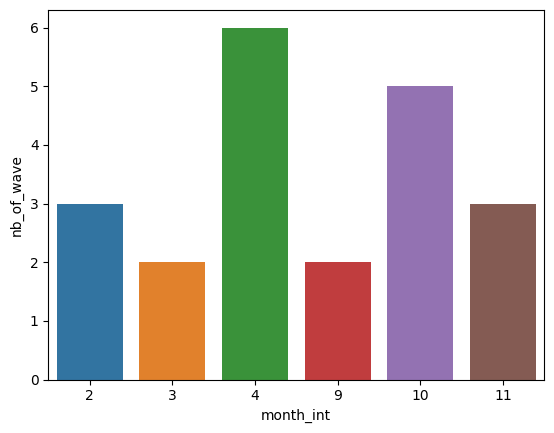

In [16]:
# number of wave per month
sns.barplot(x="month_int", y="nb_of_wave", data=nwave);

In [17]:
# transformation of the data for comparison
# per iid, calculation of the number of like, decision, match, you_call, them_cal and date
## percentage of match per wave

## order en percentage in regard of the number of partner met at the event
tab["order_per"] = 100 * tab["order"] / tab["round"]

In [18]:
# number of people met at the event
round = tab.groupby("iid")["round"].unique().explode().reset_index(name='nb_met_people')
#print("----- round -----")
#display(round)

# number of decision yes=1 or no=0 per person
prep = tab.groupby("iid")["dec_o"].value_counts().to_frame(name="nb_of_dec").reset_index()
dec = pd.pivot_table(prep, index='iid', columns='dec_o', values='nb_of_dec').reset_index()
dec.columns.name = None
dec.rename(columns = {1:'dec_Y', 0:'dec_N'}, inplace=True)
#print("----- dec -----")
#display(dec)

# number of match per person
prep = tab.groupby("iid")["match"].value_counts().to_frame(name="nb_of_match").reset_index()
match = pd.pivot_table(prep, index='iid', columns='match', values='nb_of_match').reset_index()
match.columns.name = None
match.rename(columns = {1:'match_Y', 0:'match_N'}, inplace=True)
#print("----- match -----")
#display(match)

# number of call per iid and if the iid got a date after the event 0=N 1=Y
var_to_extract = ["iid", "gender", "wave","month_int", "you_call", "them_cal", "date_3"]
rest = tab.loc[:, var_to_extract].drop_duplicates()
rest.rename(columns = {"you_call":"nb_youcall", "them_cal":"nb_themcall"}, inplace=True)
print("----- rest -----")
display(rest)

----- rest -----


,iid,gender,wave,month_int,nb_youcall,nb_themcall,date_3
0,1,0,1,10,1.0,1.0,0.0
10,2,0,1,10,0.0,0.0,0.0
20,3,0,1,10,NaN,NaN,NaN
30,4,0,1,10,0.0,0.0,0.0
40,5,0,1,10,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8268,548,1,21,4,2.0,0.0,0.0
8290,549,1,21,4,1.0,0.0,0.0
8312,550,1,21,4,NaN,NaN,NaN
8334,551,1,21,4,NaN,NaN,NaN


In [19]:
# merging
work = rest.merge(round, on="iid", how="left").merge(dec, on='iid', how="left").merge(match, on='iid', how="left")
work

,iid,gender,wave,month_int,nb_youcall,nb_themcall,date_3,nb_met_people,dec_N,dec_Y,match_N,match_Y
0,1,0,1,10,1.0,1.0,0.0,10,5.0,5.0,6.0,4.0
1,2,0,1,10,0.0,0.0,0.0,10,4.0,6.0,8.0,2.0
2,3,0,1,10,NaN,NaN,NaN,10,5.0,5.0,10.0,NaN
3,4,0,1,10,0.0,0.0,0.0,10,4.0,6.0,8.0,2.0
4,5,0,1,10,0.0,0.0,0.0,10,7.0,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537,548,1,21,4,2.0,0.0,0.0,22,12.0,10.0,17.0,5.0
538,549,1,21,4,1.0,0.0,0.0,22,12.0,10.0,17.0,5.0
539,550,1,21,4,NaN,NaN,NaN,22,16.0,6.0,18.0,4.0
540,551,1,21,4,NaN,NaN,NaN,22,12.0,10.0,20.0,2.0


In [20]:
# attribution of gender
work["gender_c"] = work["gender"].apply(lambda x : "Woman" if x == 0
                                                            else "Man")
# calculation of ratio
work["ratio_decN"] = work["dec_N"] / work["nb_met_people"]
work["ratio_decY"] = work["dec_Y"] / work["nb_met_people"]
work["ratio_matchN"] = work["match_N"] / work["nb_met_people"]
work["ratio_matchY"] = work["match_Y"] / work["nb_met_people"]
work["ratio_youcall"] = work["nb_youcall"] / work["match_Y"]
work["ratio_themcall"] = work["nb_themcall"] / work["match_Y"]
work.describe(include="all")

,iid,gender,wave,month_int,nb_youcall,nb_themcall,date_3,nb_met_people,dec_N,dec_Y,match_N,match_Y,gender_c,ratio_decN,ratio_decY,ratio_matchN,ratio_matchY,ratio_youcall,ratio_themcall
count,542.000000,542.000000,542.000000,542.000000,262.000000,262.000000,262.000000,542.0,539.000000,521.000000,542.000000,444.000000,542,539.0,521.0,542.0,444.0,225.000000,225.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,2,100.0,100.0,66.0,64.0,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,Man,0.5,0.5,1.0,0.2,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,NaN,274,38.0,38.0,94.0,37.0,NaN,NaN
mean,277.791513,0.505535,11.119926,6.636531,0.748092,0.889313,0.358779,NaN,8.920223,6.639155,12.741697,3.065315,NaN,NaN,NaN,NaN,NaN,0.338651,0.324683
std,159.271594,0.500431,6.003881,3.465541,1.732464,1.303973,0.480560,NaN,4.816246,4.012040,4.860311,2.173671,NaN,NaN,NaN,NaN,NaN,0.792821,0.358817
min,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,142.250000,0.000000,7.000000,4.000000,0.000000,0.000000,0.000000,NaN,5.000000,3.000000,9.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,277.500000,1.000000,11.000000,4.000000,0.000000,0.000000,0.000000,NaN,8.000000,6.000000,13.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000
75%,415.750000,1.000000,15.750000,10.000000,1.000000,1.000000,1.000000,NaN,13.000000,9.000000,17.000000,4.000000,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000


In [37]:
# amout of people per gender, per month and per goal
ngrouped = tab.groupby(["month_int", "gender"])["goal_c"].value_counts().to_frame(name="abundance_goal").reset_index()
ngrouped

,month_int,gender,goal_c,abundance_goal
0,2,0,social,251
1,2,0,fun,138
2,2,0,promise,46
3,2,0,date,38
4,2,0,other,35
...,...,...,...,...
64,11,1,social,148
65,11,1,promise,86
66,11,1,other,50
67,11,1,date,36


In [39]:
# distribution des goals en pourcentage par mois
goal = tab.groupby(["month_int"])["goal_c"].value_counts().to_frame(name="abundance_goal_month").reset_index()
display(goal)


,month_int,goal_c,abundance_goal_month
0,2,social,483
1,2,fun,294
2,2,date,98
3,2,promise,82
4,2,other,53
5,2,relationship,50
6,3,fun,237
7,3,social,160
8,3,relationship,64
9,3,promise,48


1. Wave characteristics
question: est ce qu'il y a eu des mois ou des waves avec plus de match?

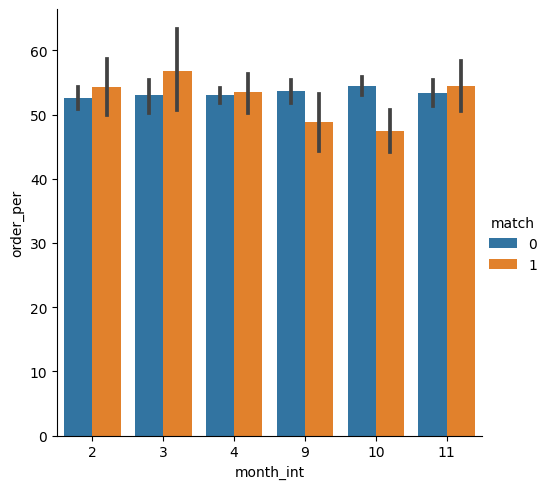

In [22]:
sns.catplot(data=tab, x="month_int", y="order_per", hue="match", kind="bar");

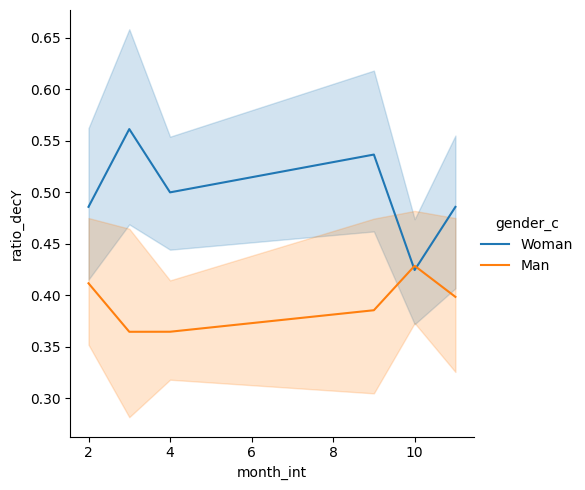

In [23]:
## how many man and woman would like to date with their partner at the event over the year
sns.relplot(data=work, x="month_int", y="ratio_decY", hue="gender_c", kind="line");

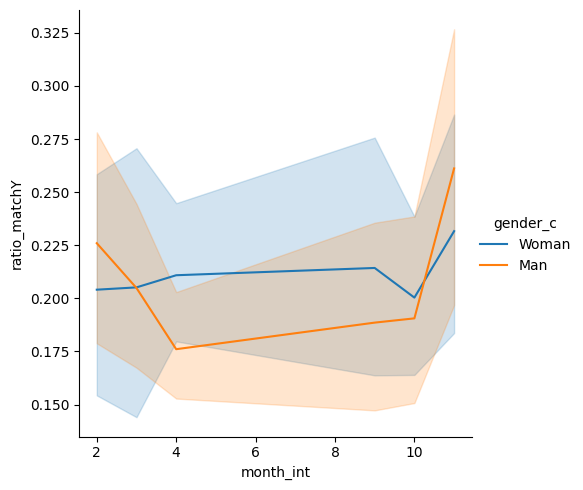

In [24]:
## how many man and woman would like to date with their partner at the event over the year
sns.relplot(data=work, x="month_int", y="ratio_matchY", hue="gender_c", kind="line");

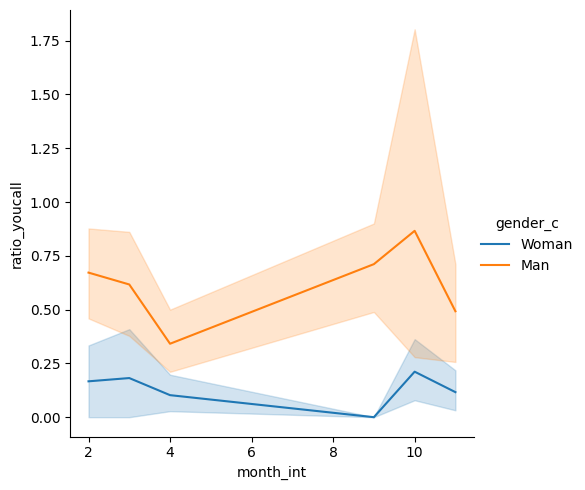

In [25]:
## how much iid called their partner
sns.relplot(data=work, x="month_int", y="ratio_youcall", hue="gender_c", kind="line");

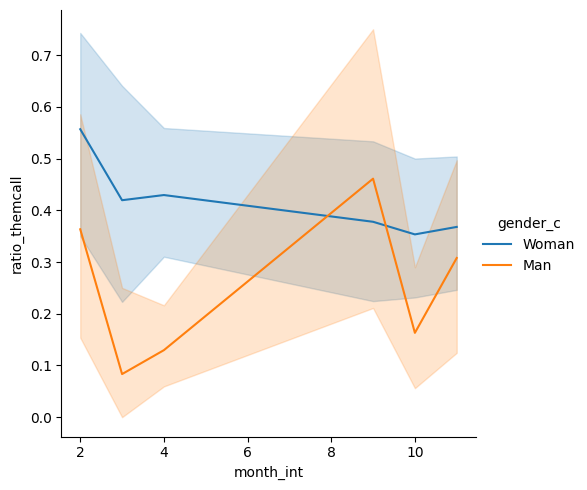

In [26]:
## how much patner call and not the iid
sns.relplot(data=work, x="month_int", y="ratio_themcall", hue="gender_c", kind="line");

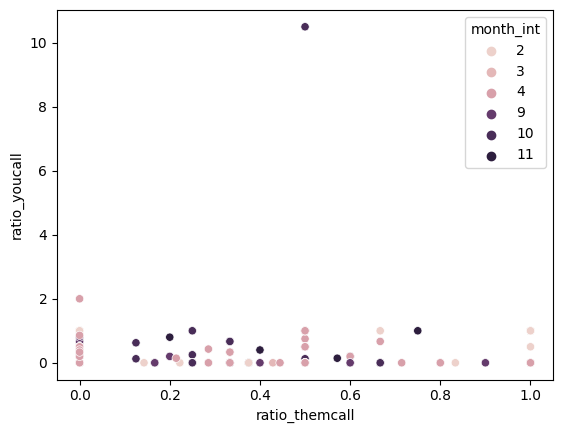

In [27]:
sns.scatterplot(data=work, x="ratio_themcall", y="ratio_youcall", hue="month_int");

2. Participants profiles

26.35962259586307


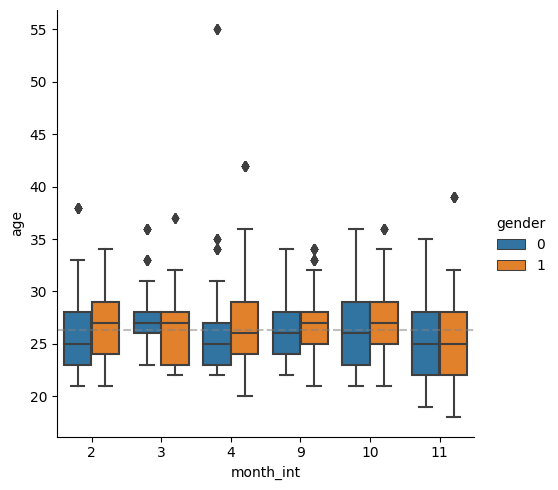

In [46]:
# age of the participants over the year
a = sns.catplot(x="month_int", y="age", data=tab, hue="gender", kind="box")
a.refline(y = tab["age"].mean(), color = "grey", alpha=0.5);

print(tab["age"].mean())

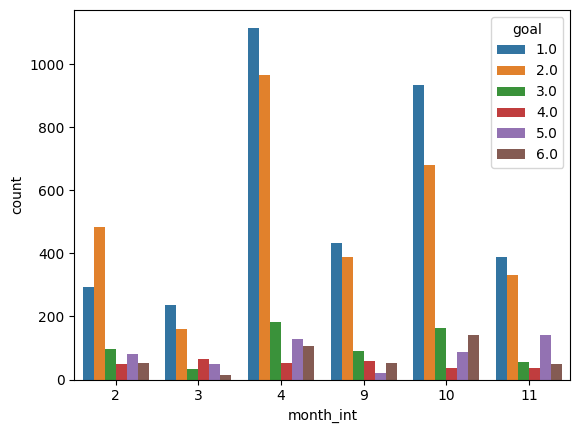

In [22]:
# goal of the participants
## Seemed like a fun night out=1
## To meet new people=2
## To get a date=3
## Looking for a serious relationship=4
## To say I did it=5
## Other=6
sns.countplot(data=tab, x="month_int", hue="goal");

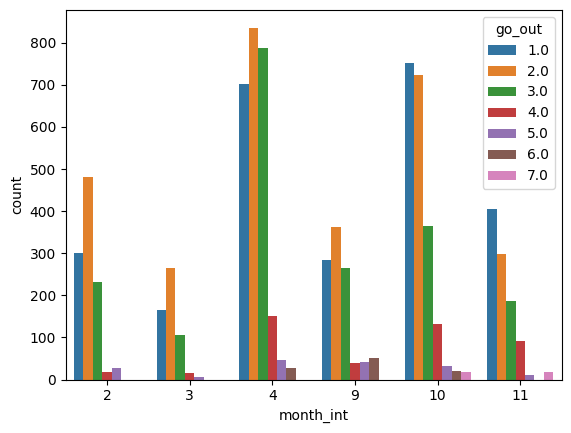

In [41]:
# habitude des participants (go_out, date) par mois
sns.countplot(data=tab, x="month_int", hue="go_out");

3. Analysis of the relationship between decisions, match, date and calls

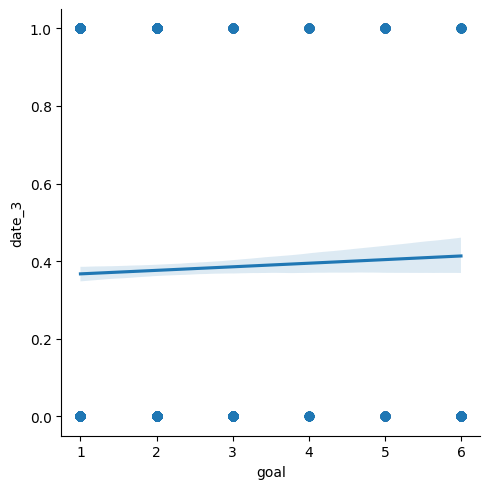

In [45]:
#sns.catplot(data=tab, x="goal", y="dec_o", kind="bar");
sns.lmplot(data=tab, x="goal", y="date_3", logistic=True);

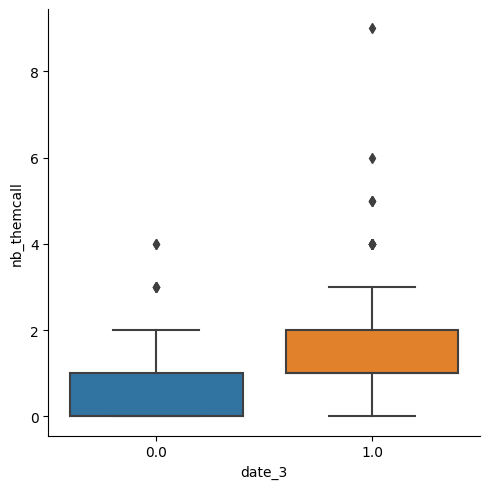

In [37]:
sns.catplot(data=work, y="nb_themcall", x="date_3", kind="box");

<AxesSubplot: >

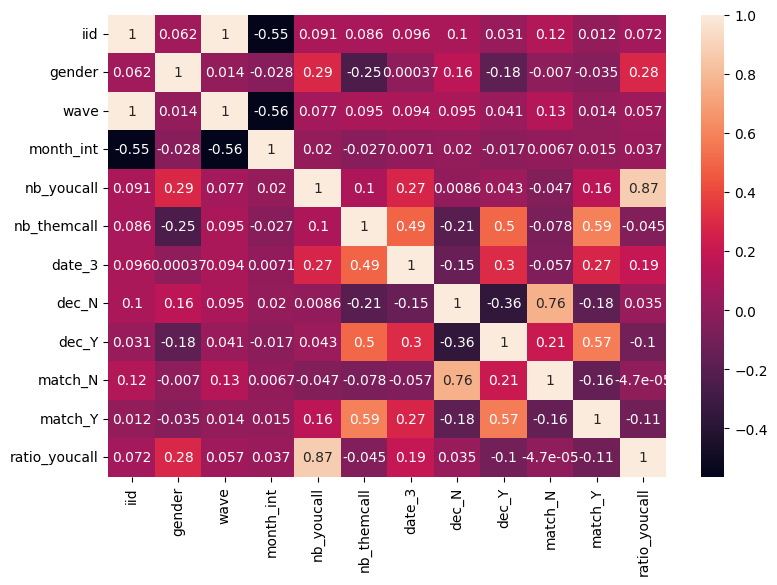

In [31]:
corr = work.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax)
# à plutôt faire entre date_3 et les attributs

In [ ]:
sns.scatterplot(data=work, x="month")

4. Attributs looked for and their contribution to decisions and dates

<AxesSubplot: >

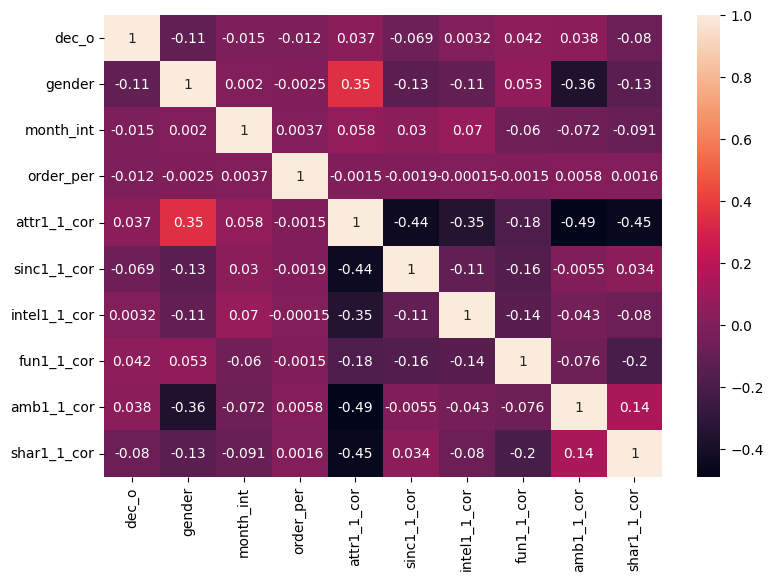

In [55]:
var_to_test = ["dec_o", "gender", "month_int", "order_per",
                "attr1_1_cor", "sinc1_1_cor", "intel1_1_cor", "fun1_1_cor", "amb1_1_cor", "shar1_1_cor"]
corr1 = tab[var_to_test].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr1, annot=True, ax=ax)

In [ ]:
to_check2 = ["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"]
to_check3 = ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"]
to_check4 = ["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]

<AxesSubplot: >

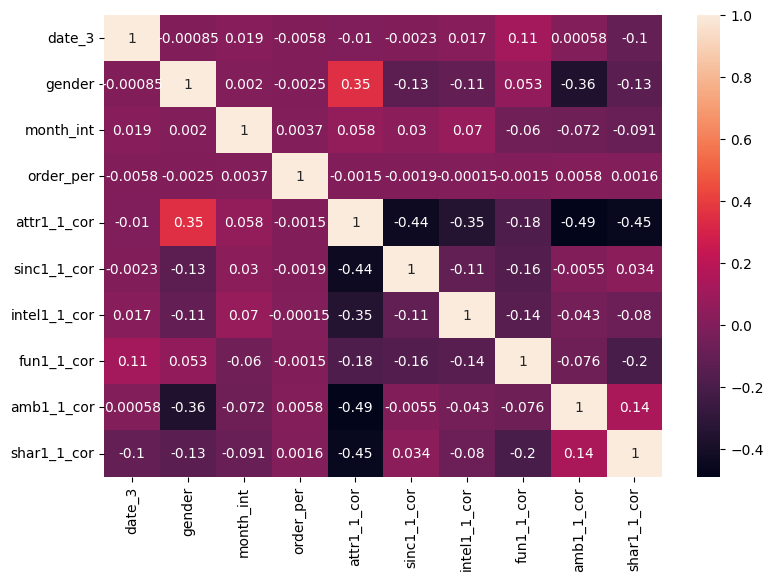

In [56]:
var_to_test = ["date_3", "gender", "month_int", "order_per",
                "attr1_1_cor", "sinc1_1_cor", "intel1_1_cor", "fun1_1_cor", "amb1_1_cor", "shar1_1_cor"]
corr1 = tab[var_to_test].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr1, annot=True, ax=ax)

<AxesSubplot: >

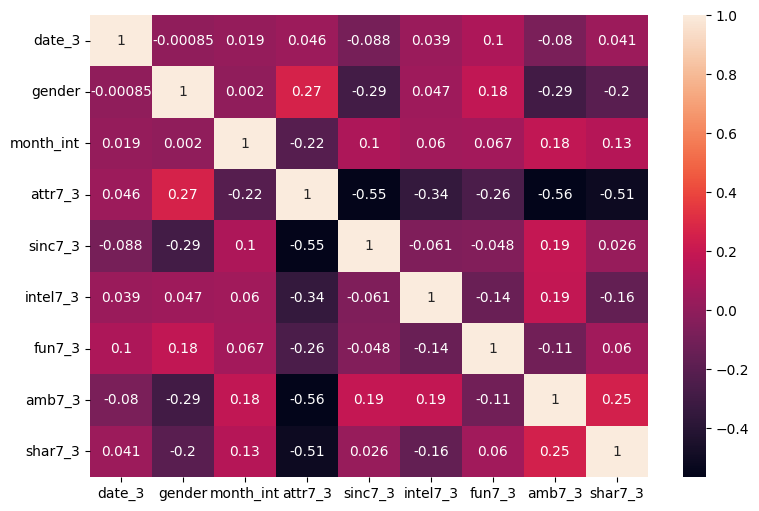

In [48]:
var_to_test = ["date_3", "gender", "month_int",
                "attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]
corr3 = tab[var_to_test].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr3, annot=True, ax=ax)